In [1]:

import pandas as pd
from portfolio import Portfolio
from strategies.nfixedbaskets import StrategyNFixedBaskets
from strategies.lasso_factors import StrategyLassoFactors

import warnings
warnings.filterwarnings('ignore')

In [2]:
# ---------------------------------------------------------------------------- #
#                                     Data                                     #
# ---------------------------------------------------------------------------- #
X = pd.read_csv("data_semi.csv")
X=X.dropna()
X.date = pd.to_datetime(X.date)
X

Unnamed: 0 order_book_id       date        AT    dolvol       D2A  \
0             0.0   000001.XSHE 2006-12-29  0.994030  0.984080 -0.964179   
1             1.0   000001.XSHE 2007-01-31  0.994042  0.986097 -0.964250   
2             2.0   000001.XSHE 2007-02-28  0.994030  0.986070 -0.958209   
3             3.0   000001.XSHE 2007-03-30  0.990225  0.974585 -0.962854   
4             4.0   000001.XSHE 2008-03-31  0.990645  0.985033 -0.977549   
...           ...           ...        ...       ...       ...       ...   
27515     27515.0   000600.XSHE 2022-07-29  0.747943  0.838763  0.747285   
27516     27516.0   000600.XSHE 2022-08-31  0.736097  0.434024  0.565647   
27517     27517.0   000600.XSHE 2022-09-30  0.736704  0.406435  0.565988   
27518     27518.0   000600.XSHE 2022-10-31  0.738588  0.763547  0.764204   
27519     27519.0   000600.XSHE 2022-11-30  0.738330  0.681788  0.764629   

        Free_CF        OL       ATO       egr  ...       Mdp      FC2Y  \
0      0.219900 -0.005970 -0.996020 -0.351244  ...  0.000995  0.021891   
1      0.219464 -0.012910 -0.996028 -0.346574  ...  0.000993  0.012910   
2      0.211940 -0.007960 -0.994030 -0.375124  ...  0.000995  0.015920   
3      0.216031 -0.002933 -0.990225  0.859238  ...  0.000978  0.004888   
4      0.438728 -0.004677 -0.985033  0.900842  ...  0.000935  0.014032   
...         ...       ...       ...       ...  ...       ...       ...   
27515 -0.351102  0.086542  0.556433 -0.851267  ...  0.000329 -0.552484   
27516 -0.639355  0.153011  0.562356 -0.858506  ...  0.000329 -0.533399   
27517 -0.638214  0.152331  0.563362 -0.857518  ...  0.000328 -0.533158   
27518 -0.140887  0.142857  0.585550 -0.856814  ...  0.000328 -0.513957   
27519 -0.142012  0.142669  0.585799 -0.857331  ...  0.000329 -0.514135   

            roa    r_12_7  Lturnover  operprof   saleinv        PM       S2P  \
0     -0.430846 -0.755224   0.787065  0.381095  0.003980  0.397015 -0.329353   
1     -0.424032 -0.809335   0.751738  0.368421 -0.001986  0.384310 -0.386296   
2     -0.430846 -0.779104   0.615920  0.353234 -0.009950  0.367164 -0.297512   
3     -0.448680 -0.442815   0.298143  0.108504 -0.001955  0.362659 -0.436950   
4     -0.519177  0.711880   0.745557  0.111319 -0.005613  0.610851 -0.438728   
...         ...       ...        ...       ...       ...       ...       ...   
27515 -0.247779 -0.156960   0.924975 -0.081935  0.681474 -0.725568  0.834156   
27516 -0.665679 -0.048371   0.417572 -0.080619  0.680816 -0.584074  0.853241   
27517 -0.665791 -0.863427   0.400525 -0.081418  0.680893 -0.585030  0.850952   
27518  0.388506 -0.228243   0.818719 -0.081773  0.681445 -0.650575  0.828571   
27519  0.387903  0.351085   0.669954 -0.081525  0.681131 -0.650888  0.822485   

          exret  
0      0.320314  
1     -0.005894  
2     -0.010693  
3      0.372638  
4      0.047803  
...         ...  
27515 -0.045190  
27516 -0.088574  
27517  0.164377  
27518  0.140869  
27519 -0.105857  

[27520 rows x 27 columns]

In [3]:
portfolio_1 = Portfolio()
portfolio_1.run(StrategyNFixedBaskets, X)


100%|██████████| 70/70 [00:00<00:00, 10001.75it/s]


Portfolio well defined.
Activated.


In [4]:
portfolio_1.stats

{'Portfolio Rate of Return': 0.01038099113075054,
 'Portfolio std': 0.0678347688504211,
 'Portfolio Sharpe': 0.15303348572825715,
 'Mean Portfolio Size': 134.67142857142858}

In [3]:
portfolio_3 = Portfolio()
portfolio_3.run(StrategyLassoFactors, X, args=[0.015])

Stock 000584.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
The total position weighting is: 0
The position weighting does not add to 1.
Portfolio well defined.
Activated.


In [4]:
portfolio_3.stats

{'Portfolio Rate of Return': -0.012068702274140948,
 'Portfolio std': 0.07319264334368193,
 'Portfolio Sharpe': -0.16488955341415104,
 'Mean Portfolio Size': 44.7}

In [10]:
import numpy as np
from tqdm import tqdm
alphas = np.logspace(-1.8, -1.2, 5)
sharpes = []
sizes = []
portfolio_list = []

for alpha in tqdm(alphas):
    print(alpha)
    portfolio_list.append(Portfolio())
    portfolio_list[-1].run(StrategyLassoFactors, X, args=[alpha])
    sharpes.append(portfolio_list[-1].stats['Portfolio Sharpe'])
    sizes.append(portfolio_list[-1].stats["Mean Portfolio Size"])

  0%|          | 0/5 [00:00<?, ?it/s]

0.015848931924611134
Stock 000584.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
The total position weighting is: 0
The position weighting does not add to 1.
Portfolio well defined.


 20%|██        | 1/5 [06:50<27:23, 410.82s/it]

Activated.
0.0223872113856834
Stock 000584.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
The total position weighting is: 0
The position weighting does not add to 1.
Portfolio well defined.


 40%|████      | 2/5 [33:39<55:47, 1115.71s/it]

Activated.
0.03162277660168379
Stock 000584.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Stock 000510.XSHE does not have sufficient training data.
The total position weighting is: 0
The position weighting does not add to 1.
Portfolio well defined.


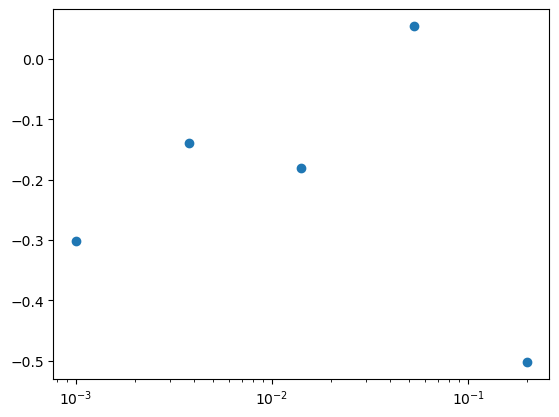

In [ ]:
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
ax.scatter(x=alphas, y=sharpes)
#ax.scatter(x=alphas, y=sizes)
ax.set_xscale('log')

In [9]:
for portfolio in portfolio_list:
    print(portfolio.stats)

{'Portfolio Rate of Return': -0.022186305130879058, 'Portfolio std': 0.07369184177572458, 'Portfolio Sharpe': -0.3010686745813921, 'Mean Portfolio Size': 45.142857142857146}
{'Portfolio Rate of Return': -0.010428180318694724, 'Portfolio std': 0.07476966522941322, 'Portfolio Sharpe': -0.13947073705222957, 'Mean Portfolio Size': 44.857142857142854}
{'Portfolio Rate of Return': -0.01324155531998824, 'Portfolio std': 0.07343238215829122, 'Portfolio Sharpe': -0.18032310720146155, 'Mean Portfolio Size': 44.871428571428574}
{'Portfolio Rate of Return': 0.003953441911227753, 'Portfolio std': 0.07234968409041694, 'Portfolio Sharpe': 0.05464352693353924, 'Mean Portfolio Size': 45.08571428571429}
{'Portfolio Rate of Return': -0.03710335848983528, 'Portfolio std': 0.07395142762820402, 'Portfolio Sharpe': -0.5017260610082473, 'Mean Portfolio Size': 48.34285714285714}


In [ ]:
num_stocks_used = len(set([item for values in portfolio_3.portfolio.values() for item in values.values()]))

In [15]:
alphas_2 = [0, 0.5, 1]
sharpes_2 = []
sizes_2 = []

for alpha in tqdm(alphas_2):
    print(alpha)
    portfolio_4 = Portfolio()
    portfolio_4.run(StrategyLassoFactors, X, args=[alpha])
    sharpes_2.append(portfolio_4.stats['Portfolio Sharpe'])
    sizes_2.append(portfolio_4.stats["Mean Portfolio Size"])

  0%|          | 0/3 [00:00<?, ?it/s]

0
Stock 000510.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Portfolio well defined.


 33%|███▎      | 1/3 [03:24<06:49, 204.90s/it]

1.228294212582291
0.04723328536185333
Activated.
0.5
Stock 000510.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Portfolio well defined.


 67%|██████▋   | 2/3 [06:27<03:11, 191.66s/it]

0.724192169370936
-0.05706368909566842
Activated.
1
Stock 000510.XSHE does not have sufficient training data.
Stock 000058.XSHE does not have sufficient training data.
Stock 000584.XSHE does not have sufficient training data.
Stock 000002.XSHE does not have sufficient training data.
Portfolio well defined.


100%|██████████| 3/3 [09:29<00:00, 189.89s/it]

0.724192169370936
-0.05706368909566842
Activated.


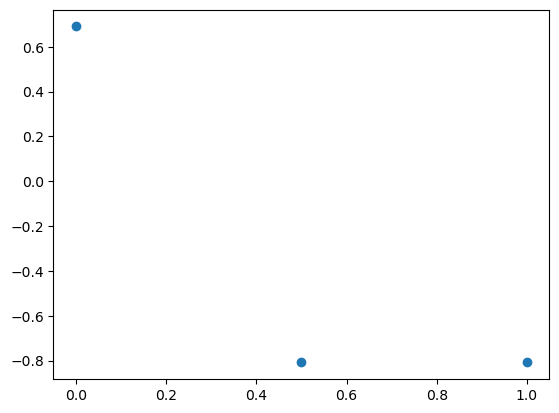

In [17]:
fig, ax = plt.subplots()
ax.scatter(x=alphas_2, y=sharpes_2)
#ax.scatter(x=alphas_2, y=sizes_2)

In [6]:
import plotly.express as px

px.line(portfolio_1.data, x='date', y=['Sharpe'])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=Sharpe<br>date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Sharpe',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Sharpe',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([datetime.datetime(2011, 9, 30, 0, 0),
                          datetime.datetime(2011, 10, 31, 0, 0),
                          datetime.datetime(2011, 11, 30, 0, 0),
                          datetime.datetime(2011, 12, 30, 0, 0),
                          datetime.datetime(2012, 1, 31, 0, 0),
                          datetime.datetime(2012, 2, 29, 0, 0),
                          datetime.datetime(2012, 3, 30, 0, 0),
                          datetime.datetime(2012, 4, 27, 0, 0),
                          datetime.datetime(2012, 5, 31, 0, 0),
                          datetime.datetime(2012, 6, 29, 0, 0),
                          datetime.datetime(2012, 7, 31, 0, 0),
                          datetime.datetime(2012, 8, 31, 0, 0),
                          datetime.datetime(2012, 9, 28, 0, 0),
                          datetime.datetime(2012, 10, 31, 0, 0),
                          datetime.datetime(2012, 11, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([       inf,        inf,        inf,        inf,        inf,        inf,
                                 inf, 0.        , 3.46410162, 3.46410162, 3.46410162, 4.69041576,
                          2.34520788, 2.34520788, 2.34520788]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Define the weights and returns data
returns = {"time_1": 0.4, "time_2": 0.1, "time_3": 0.5}
allocations = pd.DataFrame(
    {"time_1": [1, 2, 3, 4], "time_2": [0, 1, 0, 1], "time_3": [6, 5, 4, 1]},
    index=["stock_1", "stock_2", "stock_3", "stock_4"],
)


def plot_weights(returns, allocations):
    # Create the combined dataframe for heatmap
    df_heatmap = pd.concat(
        [pd.DataFrame(returns, index=["returns"]), allocations]
    )

    # Set the desired column order
    column_order = list(returns.keys())

    # Reorder the columns in the dataframe
    df_heatmap = df_heatmap[column_order]

    # Create the diverging color palettes
    cmap_weights = sns.color_palette("coolwarm", as_cmap=True)
    cmap_returns = sns.color_palette("gray_r", as_cmap=True)

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=2, figsize=(25, 45), gridspec_kw={'height_ratios': [1, len(column_order)]})

    extreme_val = abs(np.array(list((returns.values())))).max()

    # Plot the heatmap for weights
    sns.heatmap(
        df_heatmap.iloc[:1, :],
        cmap=cmap_weights,
        annot=True,
        fmt=".1f",
        cbar=True,
        ax=axes[0],
        xticklabels=False,
        vmin=-extreme_val,
        vmax=extreme_val
    )
    axes[0].set_title("Returns Heatmap")

    # Plot the heatmap for returns
    sns.heatmap(
        df_heatmap.iloc[1:, :],
        cmap=cmap_returns,
        annot=True,
        fmt=".1f",
        cbar=True,
        ax=axes[1],
        vmin=0
    )
    axes[1].set_title("Portfolio Allocations Heatmap")

    # Adjust the layout
    plt.tight_layout()

    return fig

In [6]:
# Define the weights and returns data
returns = {"time_1": 0.4, "time_2": 0.1, "time_3": 0.5}
#component_returns = pd.DataFrame(
##    {"time_1": [1, 2, 3, 4], "time_2": [0, 1, 0, 1], "time_3": [6, 5, 4, 1]},
#    index=["stock_1", "stock_2", "stock_3", "stock_4"],
#)

def plot_component_returns(returns, component_returns):
    # Create the combined dataframe for heatmap
    df_heatmap = pd.concat(
        [pd.DataFrame(returns, index=["returns"]), component_returns]
    )

    # Set the desired column order
    column_order = list(returns.keys())

    # Reorder the columns in the dataframe
    df_heatmap = df_heatmap[column_order]

    # Create the diverging color palettes
    cmap_weights = sns.color_palette("coolwarm", as_cmap=True)
    cmap_returns = sns.color_palette("coolwarm", as_cmap=True)

    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=2, figsize=(25, 45), gridspec_kw={'height_ratios': [1, len(column_order)]})

    extreme_val = abs(np.array(list((returns.values())))).max()
    component_returns_extreme = abs(component_returns).max().max()

    # Plot the heatmap for weights
    sns.heatmap(
        df_heatmap.iloc[:1, :],
        cmap=cmap_weights,
        annot=True,
        fmt=".1f",
        cbar=True,
        ax=axes[0],
        xticklabels=False,
        vmin=-extreme_val,
        vmax=extreme_val
    )
    axes[0].set_title("Returns Heatmap")

    # Plot the heatmap for returns
    sns.heatmap(
        df_heatmap.iloc[1:, :],
        cmap=cmap_returns,
        annot=True,
        fmt=".1f",
        cbar=True,
        ax=axes[1],
        vmin=-component_returns_extreme,
        vmax=component_returns_extreme
    )
    axes[1].set_title("Component Returns Heatmap")

    # Adjust the layout
    plt.tight_layout()

    return fig

In [7]:
weights_2 = pd.DataFrame(portfolio_3.portfolio).fillna(0).iloc[:, 12:]

In [8]:
returns_2 = {return_val: weight for (return_val, weight) in zip(list(weights_2.columns), list(portfolio_3.data['return']))}

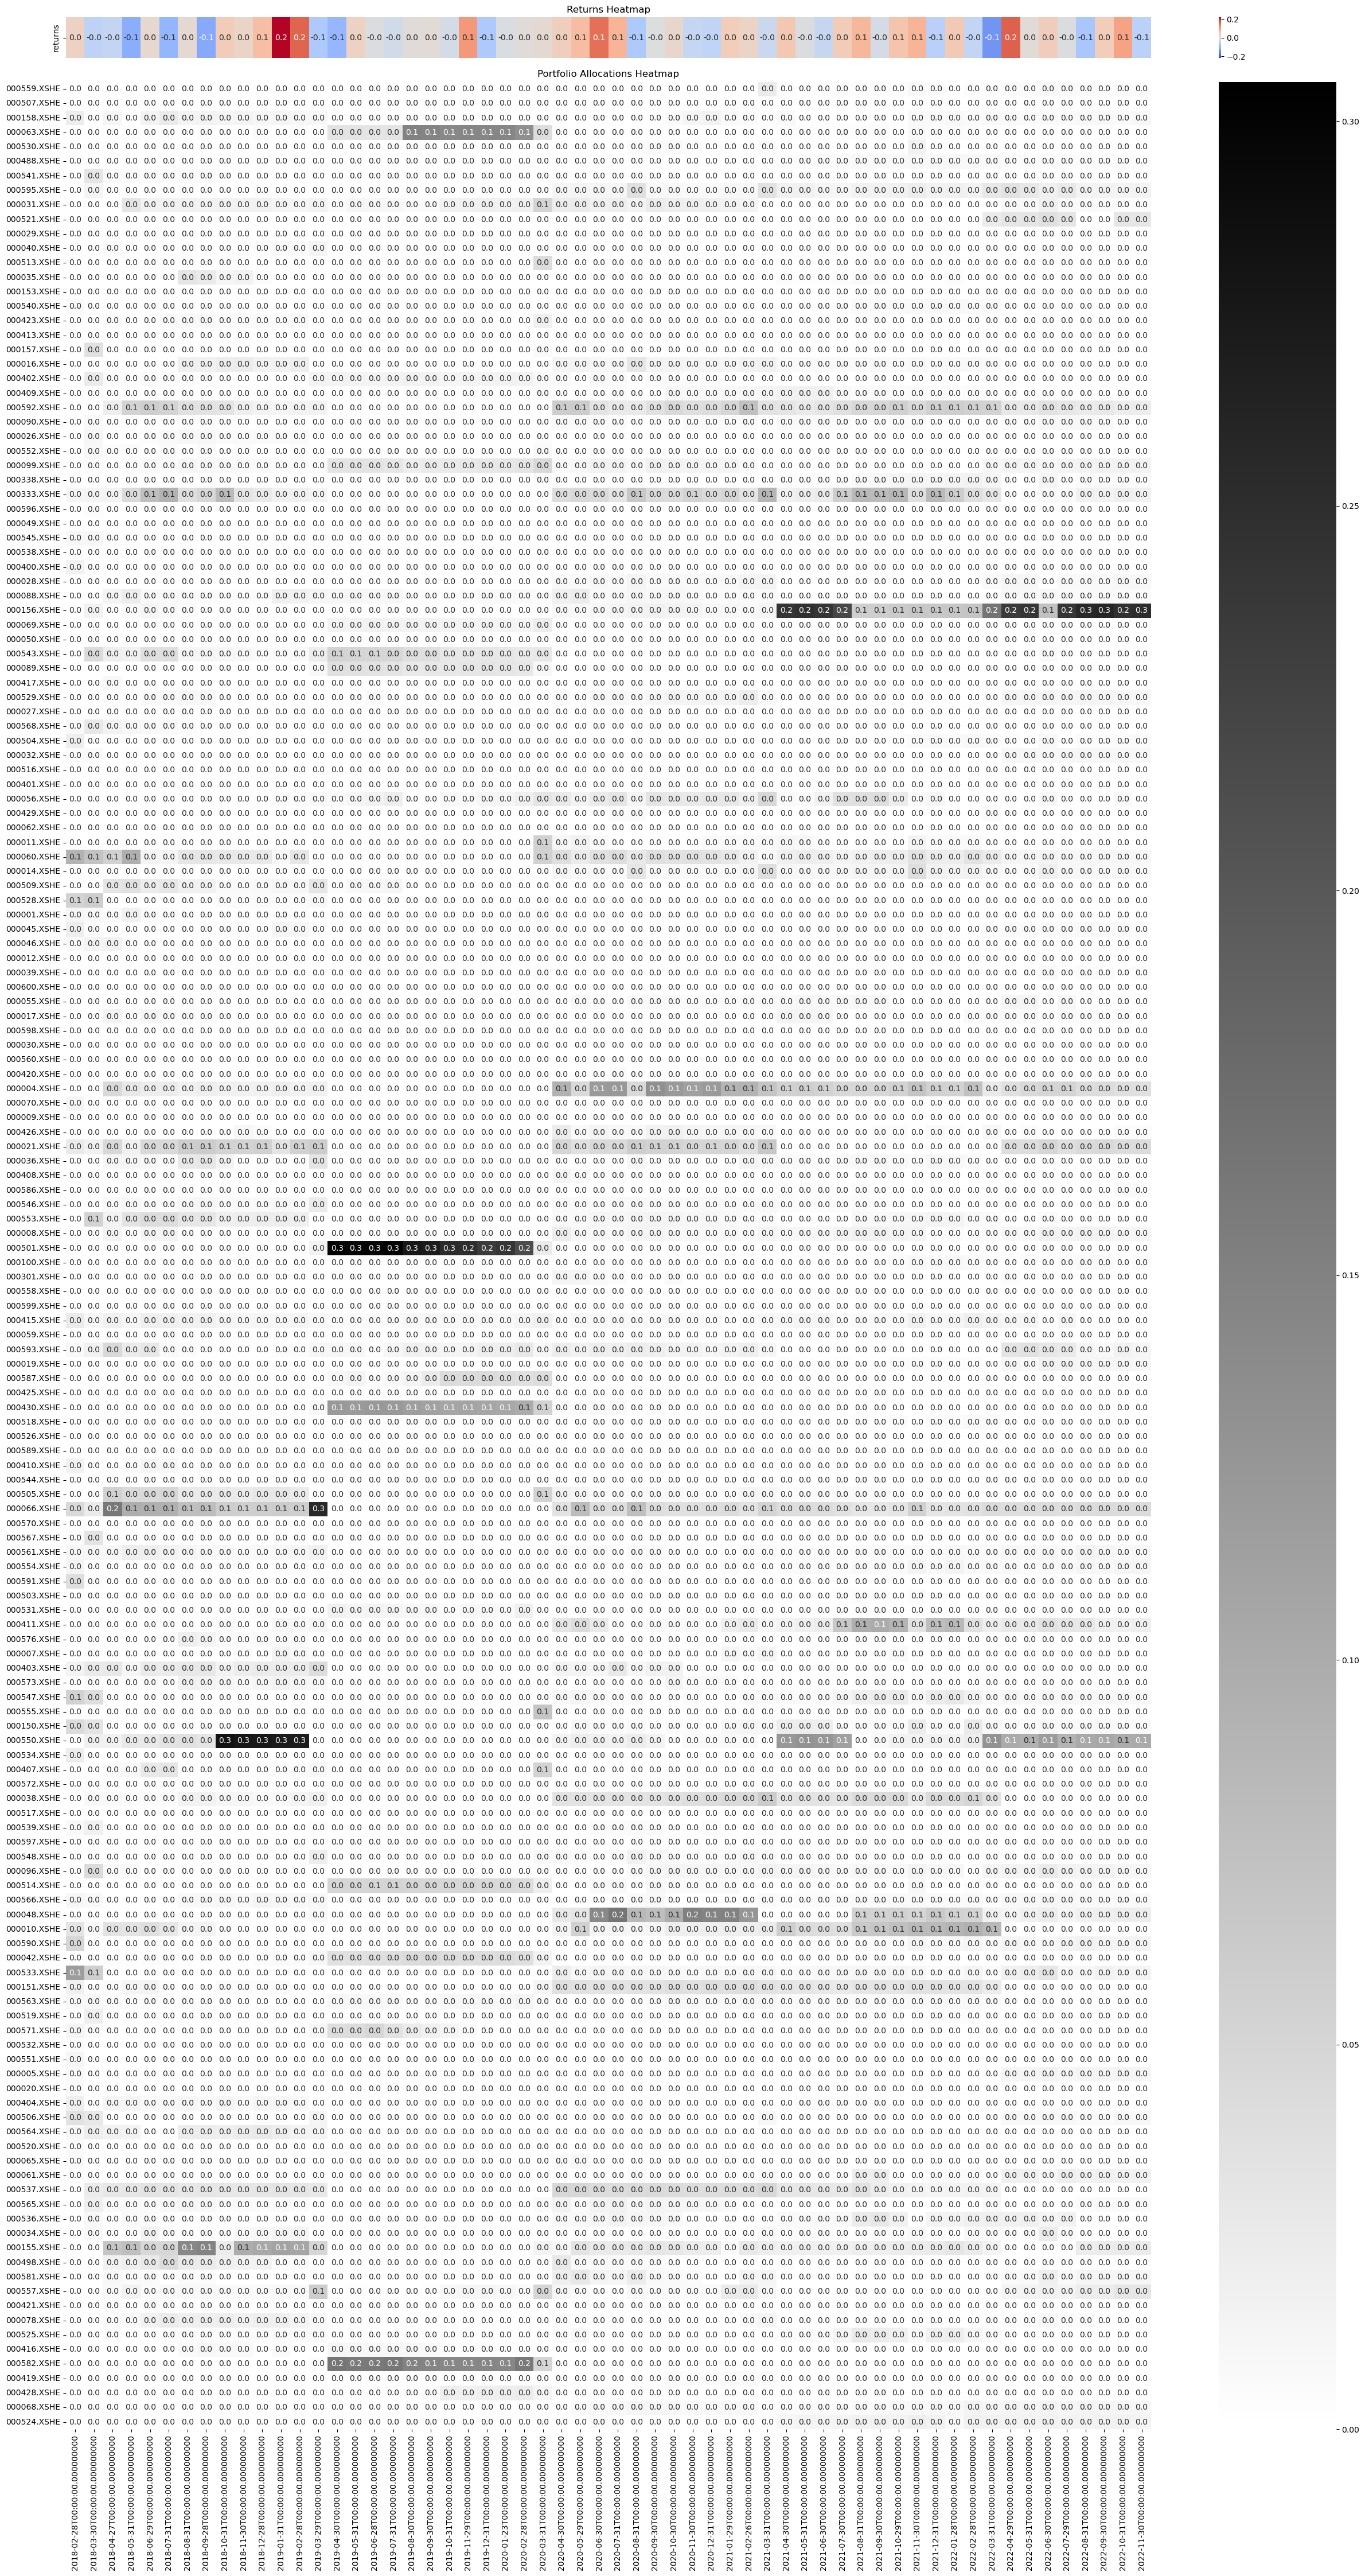

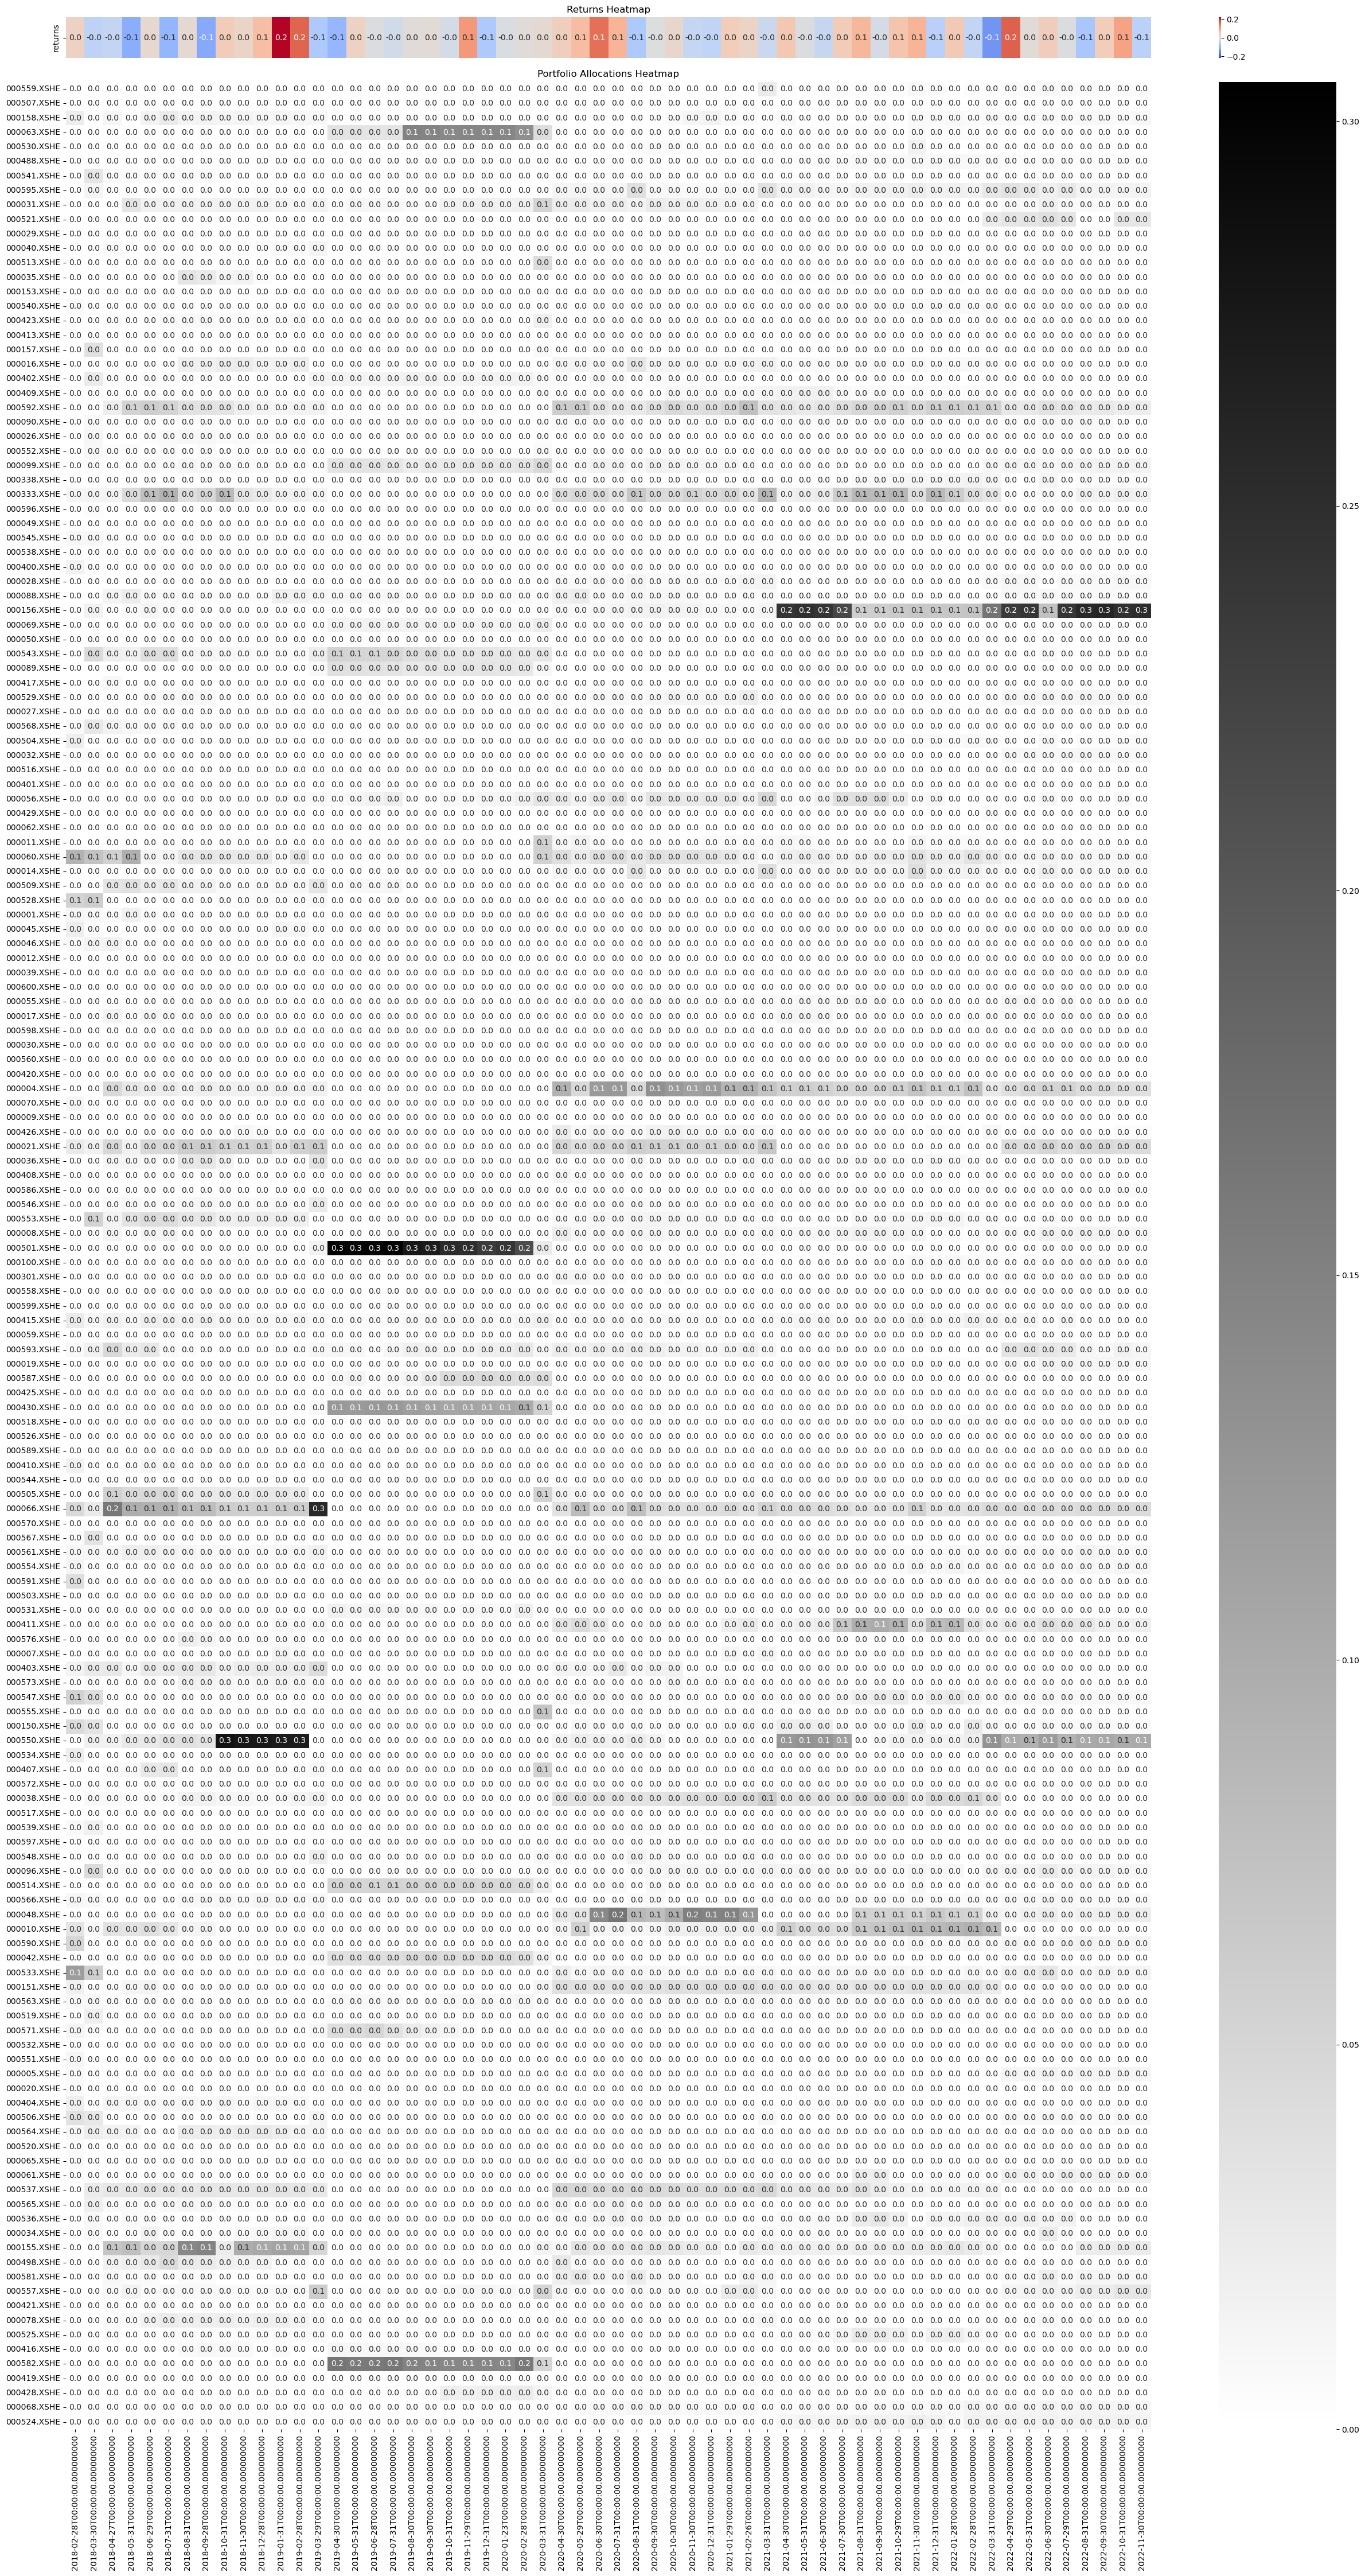

In [9]:
plot_weights(returns_2, weights_2)

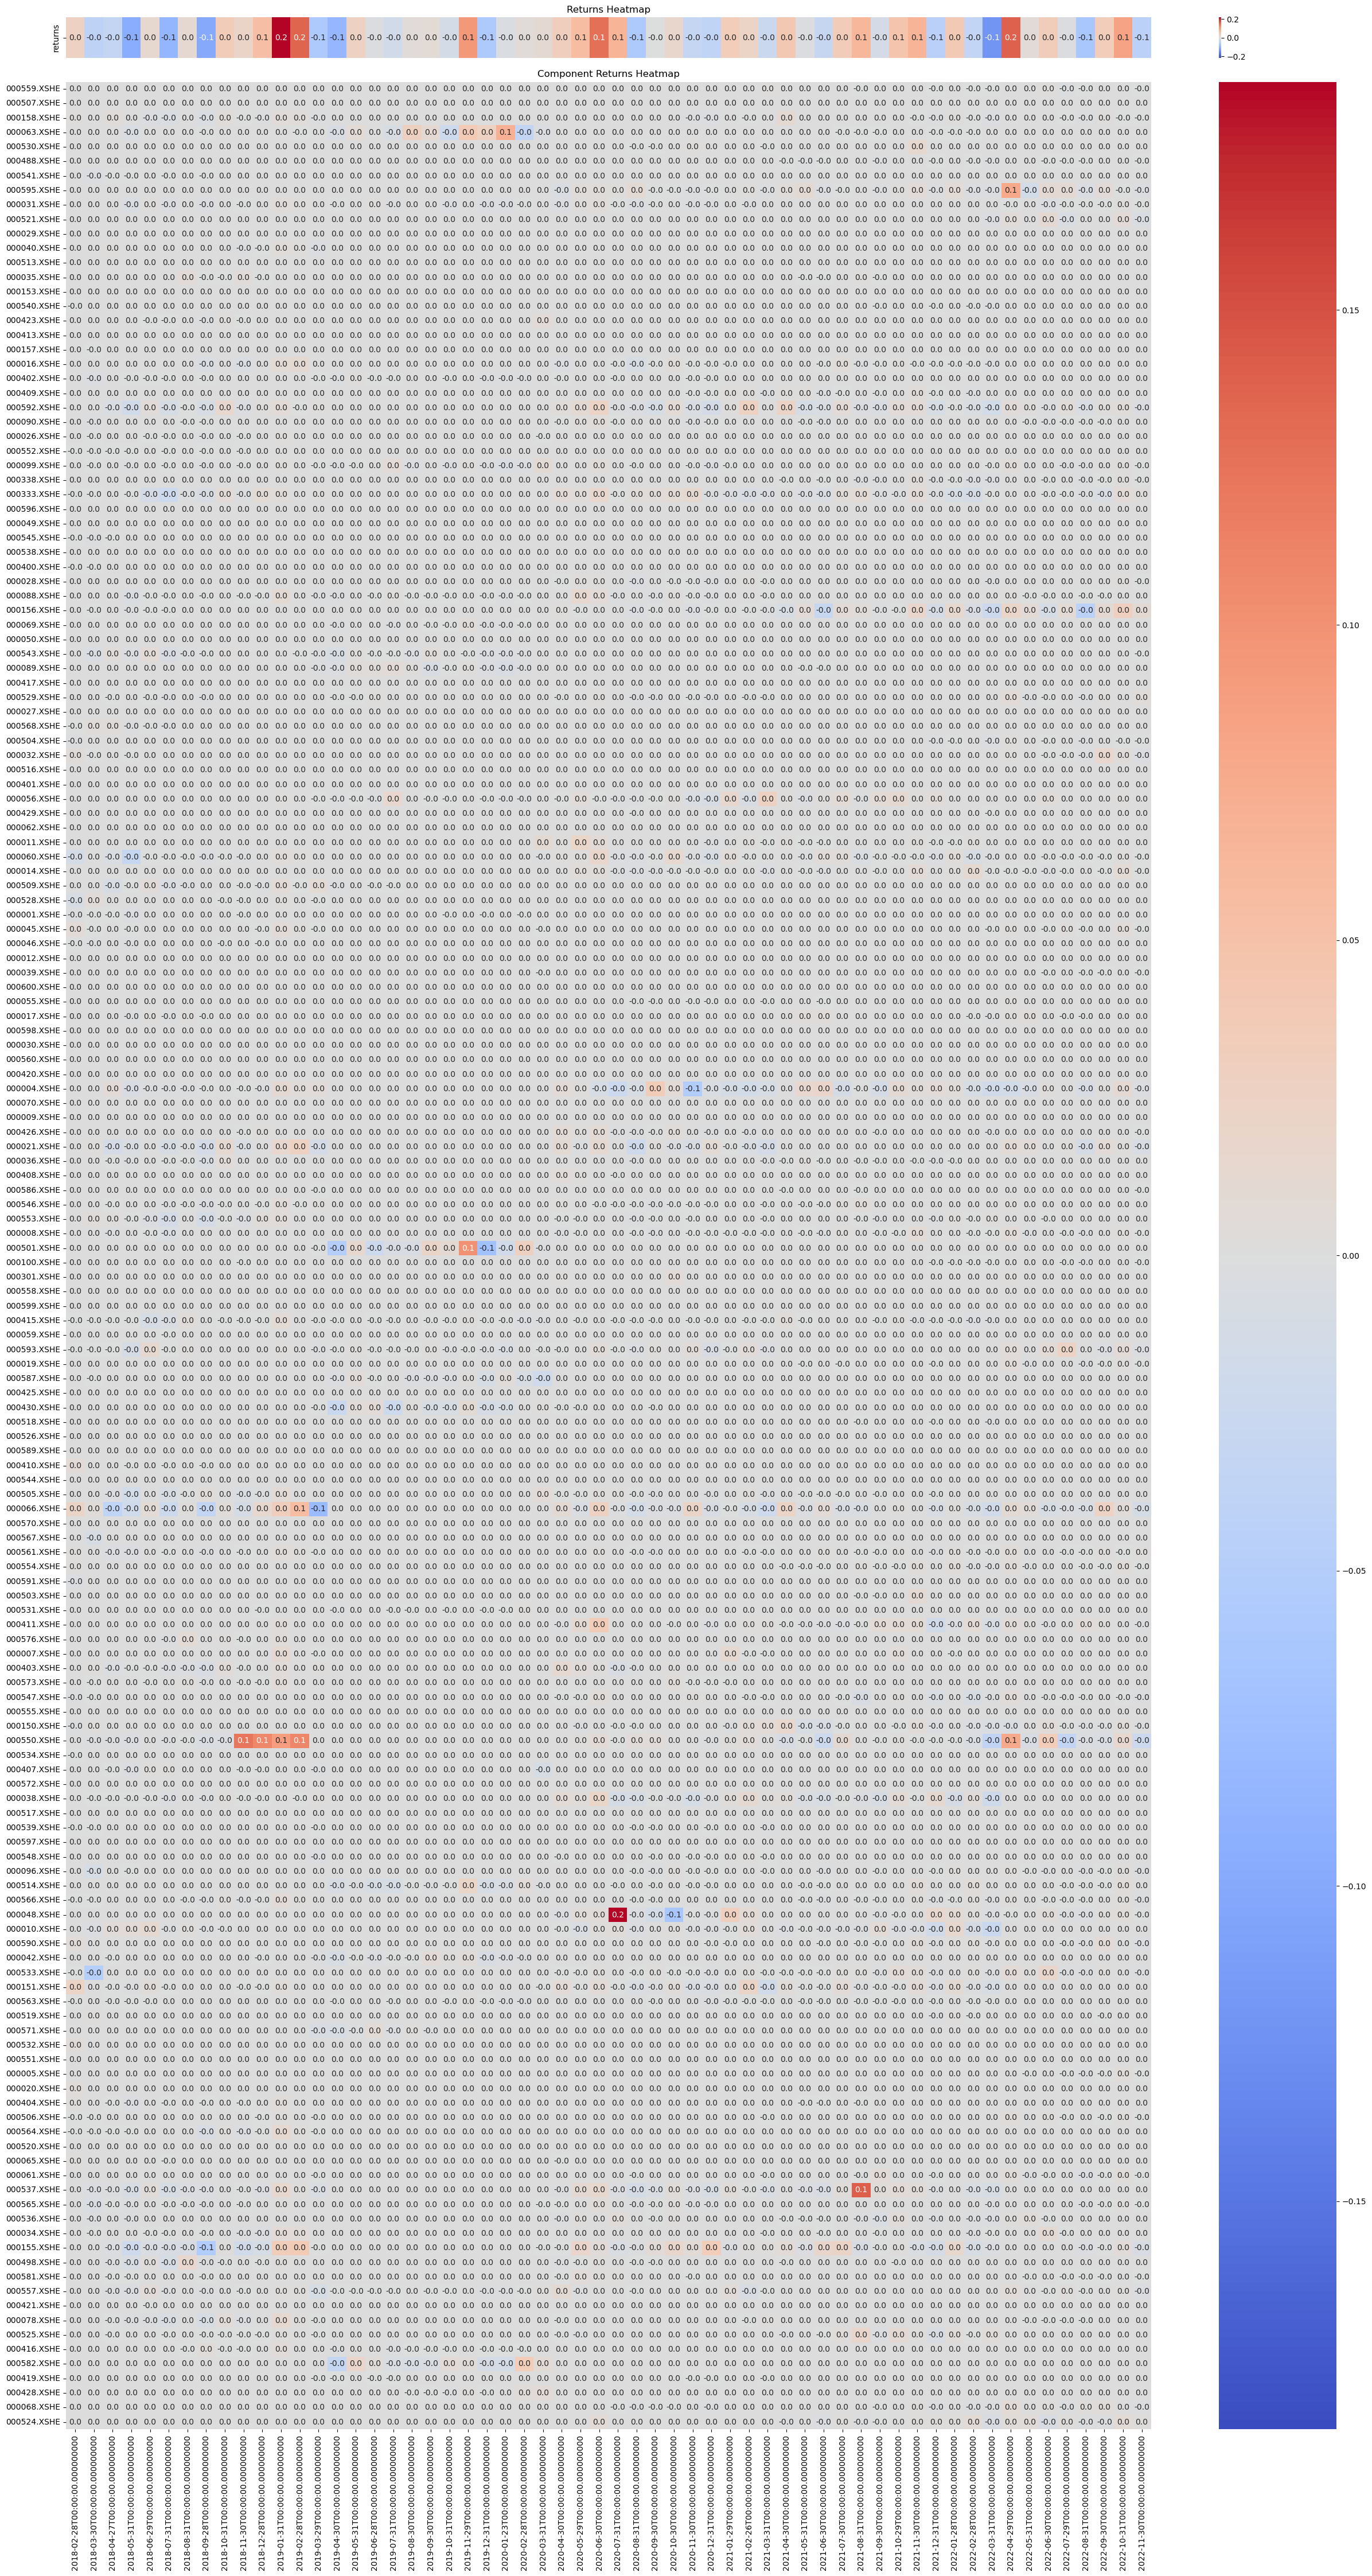

In [10]:
component_returns = pd.DataFrame(portfolio_3.component_returns).iloc[:, 12:].fillna(0)/(np.array(list(portfolio_3.data['return'])).sum())
returns_3 = {return_val: weight for (return_val, weight) in zip(list(component_returns.columns), list(portfolio_3.data['return']))}

#normalised_component_returns_3 = transposed_component_returns/abs(transposed_component_returns).max().max()
plot_component_returns(returns_3, component_returns).show()

In [ ]:
smaller_components = component_returns[component_returns > 0.01]
plot_component_returns(returns_3, component_returns).show()